In [69]:
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Load and unify data sets

In [70]:
datasets = []
for file in glob.glob("data/*_bench.csv"):
    print(file)
    tagged_lines = []
    with open(file) as f:
        for line in f:
            if line.startswith("[CSV]"):
                tagged_lines.append(line)
    
    if not tagged_lines:
        data = pd.read_csv(file)
    else:
        data = pd.read_csv(StringIO("".join(tagged_lines)) )
       
    if not "PLE" in data.columns:
        data["PLE"] = data.alpha * 2 + 1.0
    if not "TimeTotal" in data.columns:
        data["TimeTotal"] = data.totalTime
    if not "GenAvgDeg" in data.columns:
        #print(data)
        data["GenAvgDeg"] = 2.0 * data.edges / data.n
    if not "edges" in data.columns:
        data["edges"] = 0.5 * data.GenAvgDeg * data.n
        
    datasets.append(data.copy())
    
data = pd.concat(datasets)
data = data[data.TimeTotal > 0] # discard unsucessful runs (timeout)

data.groupby(["algo", "T"]).size()


data/embedder_bench.csv
data/hypergen_bench.csv
data/nkopt_bench.csv
data/nkgen_bench.csv
data/hypergirgs_bench.csv


algo        T  
Embedder    0.0    265
            0.5    254
            0.9    204
HyperGen    0.0    400
NkOpt       0.0    400
hypergirgs  0.0    280
            0.5    272
            0.9    271
nkgen       0.0    440
            0.5    270
            0.9    270
dtype: int64

In [14]:
data[data.algo=="NkOpt"].iter.unique()

array([0])

# Plot runtimes as function of number of nodes



avgDeg=10, PLE=2.200 T=0.000
['Embedder' 'HyperGen' 'NkOpt' 'hypergirgs']


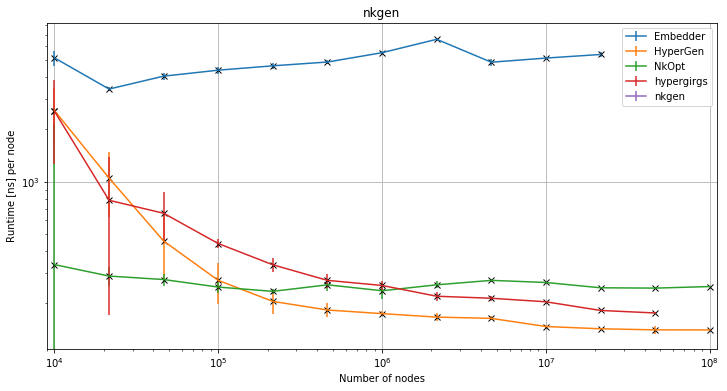



avgDeg=10, PLE=2.200 T=0.500
['Embedder' 'hypergirgs']


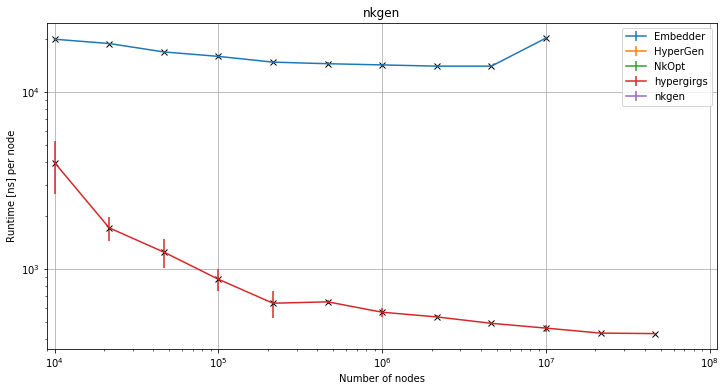



avgDeg=10, PLE=2.200 T=0.900
['Embedder' 'hypergirgs']


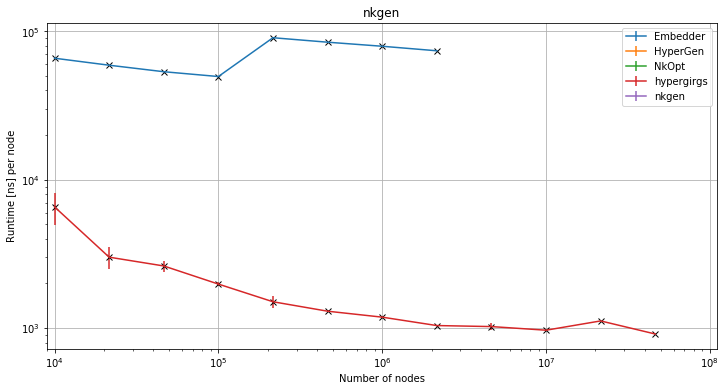



avgDeg=10, PLE=3.000 T=0.000
['Embedder' 'HyperGen' 'NkOpt' 'hypergirgs']


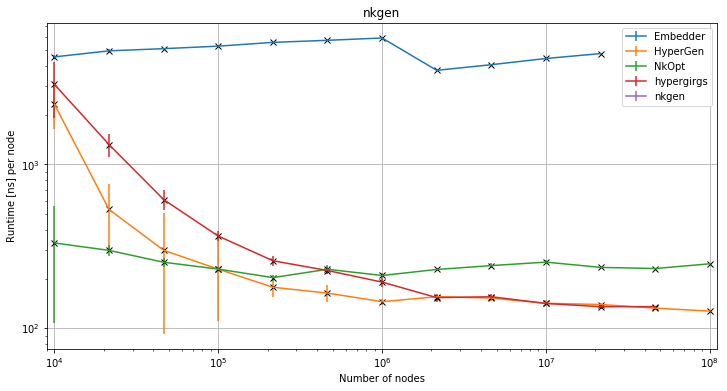



avgDeg=10, PLE=3.000 T=0.500
['Embedder' 'hypergirgs']


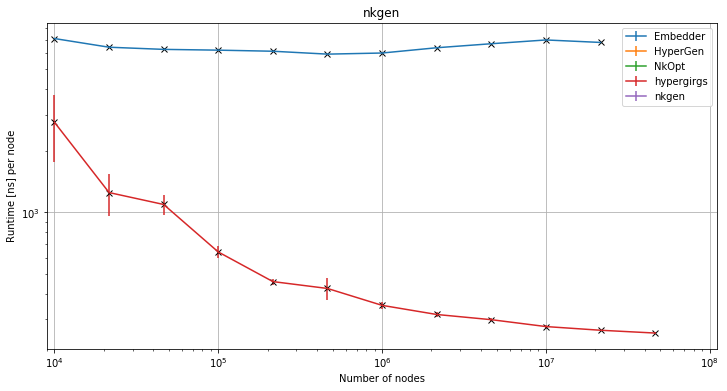



avgDeg=10, PLE=3.000 T=0.900
['Embedder' 'hypergirgs']


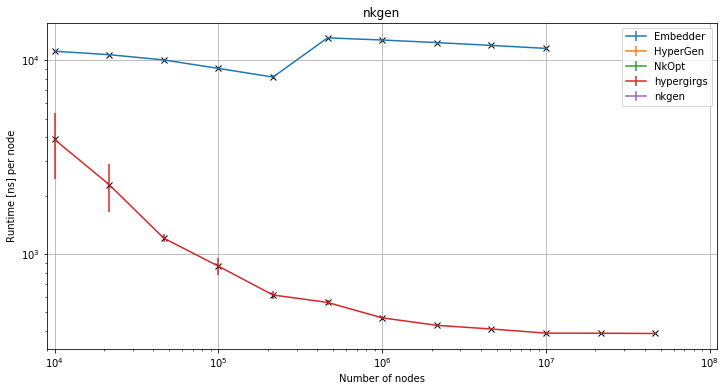



avgDeg=100, PLE=2.200 T=0.000
['Embedder' 'HyperGen' 'NkOpt' 'hypergirgs']


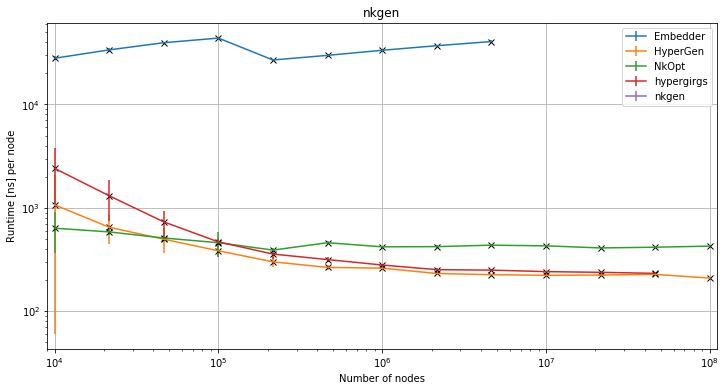



avgDeg=100, PLE=2.200 T=0.500
['Embedder' 'hypergirgs']


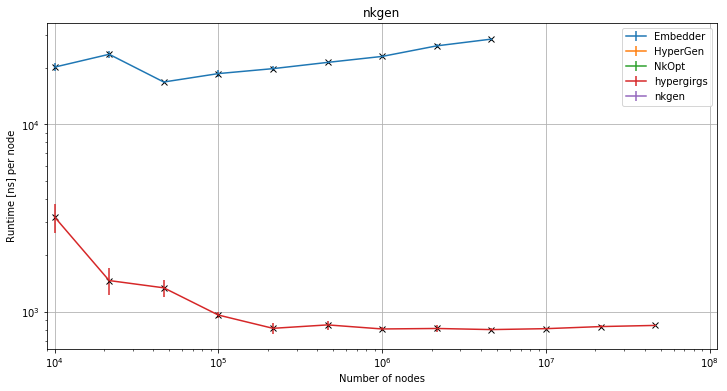



avgDeg=100, PLE=2.200 T=0.900
['Embedder' 'hypergirgs']


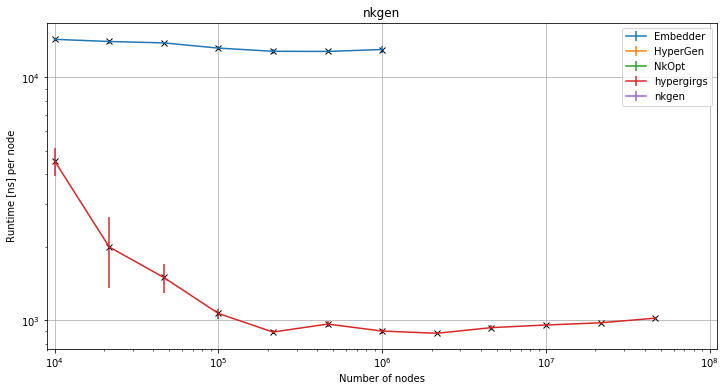



avgDeg=100, PLE=3.000 T=0.000
['Embedder' 'HyperGen' 'NkOpt' 'hypergirgs']


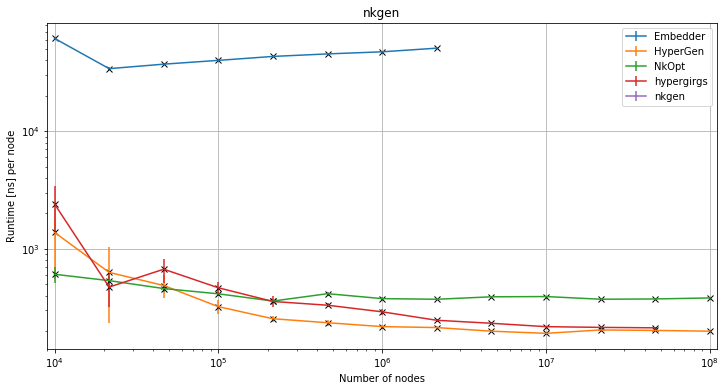



avgDeg=100, PLE=3.000 T=0.500
['Embedder' 'hypergirgs']


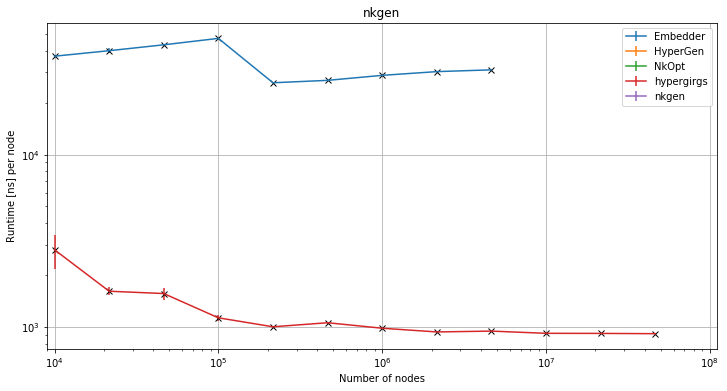



avgDeg=100, PLE=3.000 T=0.900
['Embedder' 'hypergirgs']


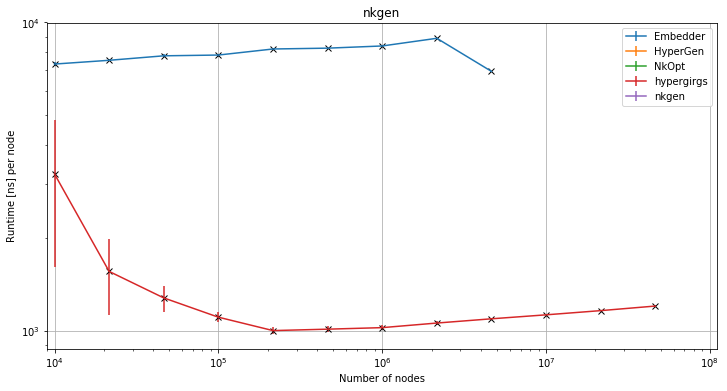



avgDeg=1000, PLE=2.200 T=0.000
['Embedder' 'HyperGen' 'NkOpt' 'hypergirgs']


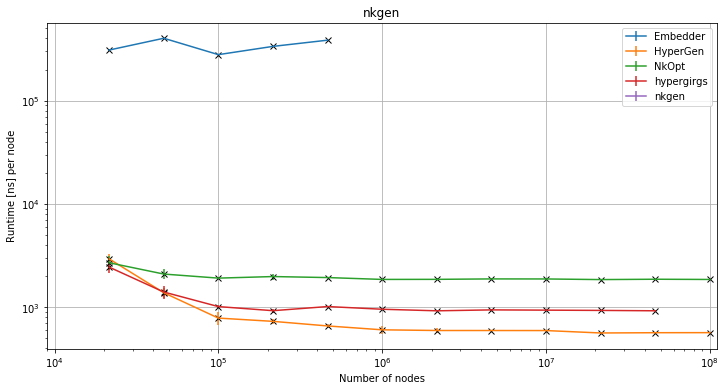



avgDeg=1000, PLE=2.200 T=0.500
['Embedder' 'hypergirgs']


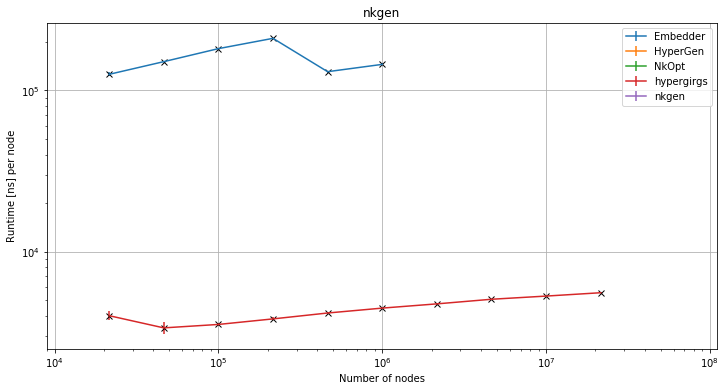



avgDeg=1000, PLE=2.200 T=0.900
['Embedder' 'hypergirgs']


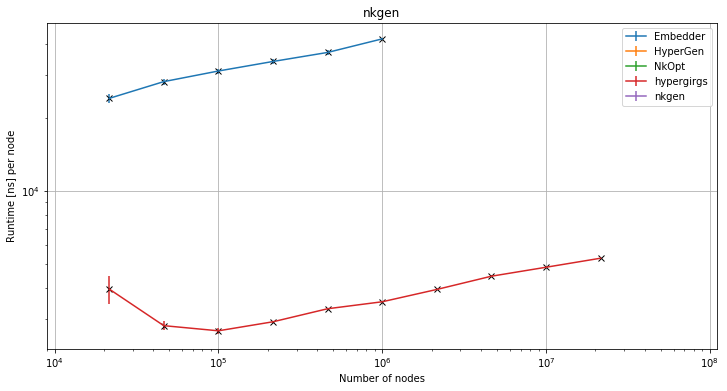



avgDeg=1000, PLE=3.000 T=0.000
['Embedder' 'HyperGen' 'NkOpt' 'hypergirgs']


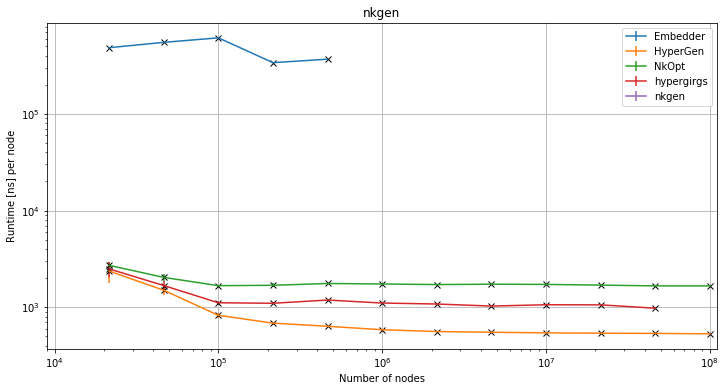



avgDeg=1000, PLE=3.000 T=0.500
['Embedder' 'hypergirgs']


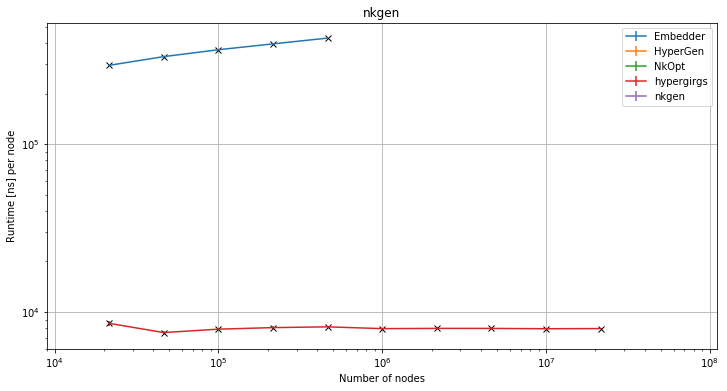



avgDeg=1000, PLE=3.000 T=0.900
['Embedder' 'hypergirgs']


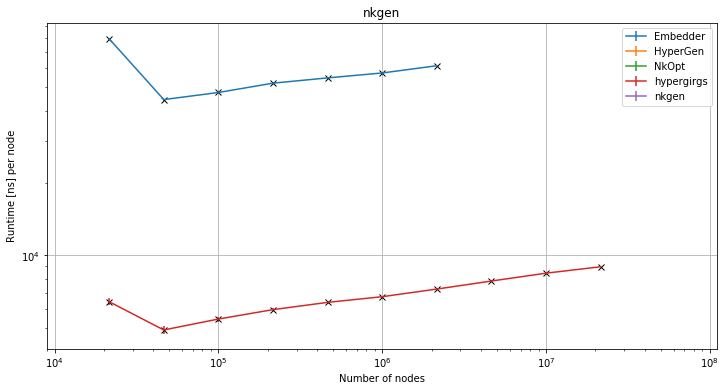

In [71]:
def ploteb(view, valueIndex, legend="", keyIndex = "n", ax = plt):
    xs = view[keyIndex].median()
    ys = view[valueIndex].median() / xs * 1e6
    yerr = view[valueIndex].std() / xs * 1e6
    
    ax.plot(xs, ys, "xk", label="")
    ax.errorbar(xs, ys, yerr, label=legend)
    
    return max(ys) if len(ys) else 0

algos = sorted(data.algo.unique())
for run, run_view in data.groupby(["avgDeg", "PLE", "T"]):
    title = "avgDeg=%d, PLE=%.3f T=%.3f" % run
    print("\n\n" + title)
    print(run_view.algo.unique())
    f, axs = plt.subplots(1, 1, sharey=True, figsize=(12,6))
    
    axs.set_ylabel("Runtime [ns] per node")
    axs.set_xlabel("Number of nodes")
    
    maxx = 0
    
    for i, algo in enumerate(algos):
        ax = axs
        ax.set_title(algo)
        ax.loglog()
        ax.grid()
        grp = run_view[run_view.algo==algo].groupby("n")
        maxx = max(maxx, ploteb(grp, "TimeTotal",   algo, ax = ax, keyIndex="n"))
         #maxx = max(maxx, ploteb(grp, "TimePoints",  "Gen Points", ax = ax))
        
    axs.set_xlim(0.9e4, 1.1e8)
    
    plt.legend()
        
    plt.show()
        


# Spread of realized degrees vs. requested degrees

In [54]:
sdata = data[(data["T"] == 0) & (data.PLE==2.2) & (data.n >= 1e4)]
print(sdata.groupby(["avgDeg", "algo"]).GenAvgDeg.median())
print(sdata.groupby(["avgDeg", "algo"]).GenAvgDeg.std())


avgDeg  algo      
10      HyperGen        10.193600
        NkOpt            9.920450
        hypergirgs       9.720915
        nkgen            9.782980
100     HyperGen       103.186000
        NkOpt           98.984050
        hypergirgs      99.924000
        nkgen           98.390073
1000    HyperGen      1032.870000
        NkOpt          986.025000
        hypergirgs     987.513500
        nkgen          984.694548
Name: GenAvgDeg, dtype: float64
avgDeg  algo      
10      HyperGen       0.845049
        NkOpt          0.810138
        hypergirgs     0.792644
        nkgen          0.603170
100     HyperGen       2.900059
        NkOpt          3.551467
        hypergirgs     3.525589
        nkgen          3.235809
1000    HyperGen      39.564913
        NkOpt         28.620850
        hypergirgs    21.975808
        nkgen         31.570677
Name: GenAvgDeg, dtype: float64


size algo
Embedder       85
HyperGen      150
NkOpt         150
hypergirgs    108
nkgen         150
dtype: int64


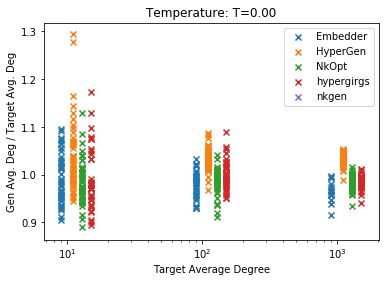

size algo
Embedder       85
hypergirgs    104
nkgen          65
dtype: int64


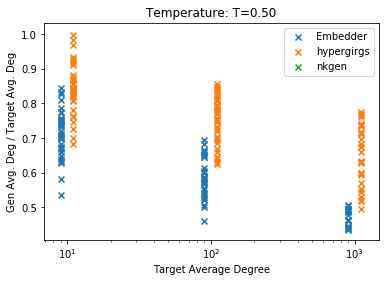

size algo
Embedder       52
hypergirgs    104
nkgen          65
dtype: int64


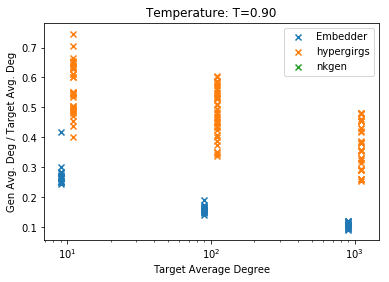

In [72]:
sdata = data[(data.PLE == 2.2) & (data.n >= 1e5)]
for T, Tview in sdata.groupby("T"):
    plt.semilogx()
    plt.xlabel("Target Average Degree")
    plt.ylabel("Gen Avg. Deg / Target Avg. Deg")
    plt.title("Temperature: T=%.2f" % T)
    grp = Tview.groupby("algo")
    print("size", grp.size())
    for i, (algo, view) in enumerate(grp):
        plt.scatter(view.avgDeg * (0.9 + 0.2 * i),
                    view.GenAvgDeg / view.avgDeg,
                    marker="x",
                    label=algo)
        
    plt.legend()
    plt.show()
    


In [11]:
data["error"] = data.GenAvgDeg / data.avgDeg
view = data[data.algo == "hypergirgs"]
view.sort_values("error")


,GenAvgDeg,GenNumEdge,PLE,R,T,TimeEdges,TimePoints,TimePrepro,TimeTotal,algo,...,edges,host,iter,n,preprocessTime,samplingTime,seed,time,totalTime,error
33,3.00672,3.238890e+07,2.2,37.5084,0.0,2448.92000,537.169000,1414.58000,4498.01000,hypergirgs,...,NaN,gluten,0.0,21544346.0,NaN,NaN,330.0,NaN,NaN,0.003007
103,3.04291,3.277879e+07,2.2,38.5956,0.5,9534.40000,556.330000,1784.37000,11992.30000,hypergirgs,...,NaN,gluten,0.0,21544346.0,NaN,NaN,1030.0,NaN,NaN,0.003043
138,3.23069,3.480153e+07,3.0,34.2011,0.5,2885.21000,532.330000,1040.05000,4519.24000,hypergirgs,...,NaN,gluten,0.0,21544346.0,NaN,NaN,1380.0,NaN,NaN,0.003231
68,3.23110,3.480595e+07,3.0,33.2939,0.0,597.68000,513.132000,981.52600,2151.48000,hypergirgs,...,NaN,gluten,0.0,21544346.0,NaN,NaN,680.0,NaN,NaN,0.003231
101,57.61410,1.337105e+08,2.2,29.2418,0.5,2441.96000,128.010000,264.20100,2848.43000,hypergirgs,...,NaN,gluten,0.0,4641588.0,NaN,NaN,1010.0,NaN,NaN,0.057614
104,63.58380,1.475648e+09,2.2,33.8470,0.5,25981.70000,1095.000000,1870.51000,29060.60000,hypergirgs,...,NaN,gluten,0.0,46415888.0,NaN,NaN,1040.0,NaN,NaN,0.063584
93,6.47895,1.503631e+08,2.2,38.4522,0.5,15217.60000,1023.300000,2571.73000,19025.60000,hypergirgs,...,NaN,gluten,0.0,46415888.0,NaN,NaN,930.0,NaN,NaN,0.064789
34,73.09600,1.696407e+09,2.2,32.6650,0.0,3600.31000,1052.850000,1742.19000,6505.70000,hypergirgs,...,NaN,gluten,0.0,46415888.0,NaN,NaN,340.0,NaN,NaN,0.073096
66,74.35080,1.725528e+08,3.0,23.9440,0.0,419.84700,116.980000,206.40100,757.60700,hypergirgs,...,NaN,gluten,0.0,4641588.0,NaN,NaN,660.0,NaN,NaN,0.074351
136,74.53400,1.729780e+08,3.0,24.8474,0.5,2859.32000,120.033000,223.08600,3216.70000,hypergirgs,...,NaN,gluten,0.0,4641588.0,NaN,NaN,1360.0,NaN,NaN,0.074534


In [42]:
data[(data.algo=="nkgen") & (data.PLE==2.2) & (data["T"] == 0)].sort_values(["n","avgDeg"])

,GenAvgDeg,GenNumEdge,PLE,R,T,TimeEdges,TimePoints,TimePrepro,TimeTotal,algo,...,avgDeg,edges,host,iter,n,preprocessTime,samplingTime,seed,time,totalTime
0,9.945218,NaN,2.2,NaN,0.0,NaN,NaN,NaN,72.0,nkgen,...,10,1.071100e+04,99b8a9be564a,0,2154,27.0,40.0,NaN,0.0,72.0
264,12.780873,NaN,2.2,NaN,0.0,NaN,NaN,NaN,73.0,nkgen,...,10,1.376500e+04,99b8a9be564a,1,2154,40.0,30.0,NaN,0.0,73.0
528,9.228412,NaN,2.2,NaN,0.0,NaN,NaN,NaN,75.0,nkgen,...,10,9.939000e+03,99b8a9be564a,2,2154,42.0,30.0,NaN,0.0,75.0
792,12.000929,NaN,2.2,NaN,0.0,NaN,NaN,NaN,10.0,nkgen,...,10,1.292500e+04,99b8a9be564a,3,2154,0.0,8.0,NaN,0.0,10.0
1056,10.208914,NaN,2.2,NaN,0.0,NaN,NaN,NaN,54.0,nkgen,...,10,1.099500e+04,99b8a9be564a,4,2154,23.0,29.0,NaN,0.0,54.0
15,90.953575,NaN,2.2,NaN,0.0,NaN,NaN,NaN,4.0,nkgen,...,100,9.795700e+04,99b8a9be564a,0,2154,0.0,0.0,NaN,0.0,4.0
279,78.423398,NaN,2.2,NaN,0.0,NaN,NaN,NaN,44.0,nkgen,...,100,8.446200e+04,99b8a9be564a,1,2154,14.0,27.0,NaN,0.0,44.0
543,86.197772,NaN,2.2,NaN,0.0,NaN,NaN,NaN,80.0,nkgen,...,100,9.283500e+04,99b8a9be564a,2,2154,40.0,30.0,NaN,0.0,80.0
807,98.562674,NaN,2.2,NaN,0.0,NaN,NaN,NaN,3.0,nkgen,...,100,1.061520e+05,99b8a9be564a,3,2154,0.0,0.0,NaN,0.0,3.0
1071,86.407614,NaN,2.2,NaN,0.0,NaN,NaN,NaN,4.0,nkgen,...,100,9.306100e+04,99b8a9be564a,4,2154,0.0,0.0,NaN,0.0,4.0


In [43]:
for algo, view in data.groupby("algo"):
    print(algo, sorted(view.n.unique()))

HyperGen [10000, 21544, 46415, 100000, 215443, 464158, 1000000, 2154434, 4641588, 10000000, 21544346, 46415888, 100000000]
NkOpt [10000, 21544, 46415, 100000, 215443, 464158, 1000000, 2154434, 4641588, 10000000, 21544346, 46415888, 100000000]
hypergirgs [10000, 21544, 46415, 100000, 215443, 464158, 1000000, 2154434, 4641588, 10000000, 21544346, 46415888]
nkgen [2154, 4641, 10000, 21544, 46415, 100000, 215443, 464158, 1000000, 2154434, 4641588, 10000000, 21544346, 46415888, 100000000]
